In [752]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [753]:
csv_path = ('D:\data analyst\datacleaning\Cafe Sales - Dirty Data for Cleaning Training\dirty_cafe_sales.csv')
df = pd.read_csv(csv_path)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\aungh\AppData\Local\Temp\ipykernel_6272\3608107799.py:1: SyntaxWarning: invalid escape sequence '\d'
  csv_path = ('D:\data analyst\datacleaning\Cafe Sales - Dirty Data for Cleaning Training\dirty_cafe_sales.csv')


format date-time

In [754]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')


In [755]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9667 non-null   object        
 2   Quantity          9862 non-null   object        
 3   Price Per Unit    9821 non-null   object        
 4   Total Spent       9827 non-null   object        
 5   Payment Method    7421 non-null   object        
 6   Location          6735 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(7)
memory usage: 625.1+ KB


In [756]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [757]:
df.tail()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02
9999,TXN_6170729,Sandwich,3,4.0,12.0,Cash,In-store,2023-11-07


In [758]:
df.sample(4)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
5351,TXN_7445500,Salad,4,5.0,20.0,Cash,In-store,NaT
2131,TXN_3277379,Salad,2,5.0,10.0,Credit Card,Takeaway,2023-01-06
6681,TXN_9362958,Juice,1,3.0,3.0,Cash,In-store,2023-07-19
6089,TXN_7077961,Tea,4,1.5,6.0,Digital Wallet,Takeaway,2023-09-19


In [759]:
df.isna().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     460
dtype: int64

Handling Missing Data in Quantity, Price Per Unit, and Total Spent¶
In this dataset, the columns Quantity, Price Per Unit, and Total Spent are mathematically related:

Total Spent = Quantity × Price Per Unit

To calculate any one of these values, you need the other two to be present. If two out of the three are missing (i.e., NaN), it’s impossible to compute the third because there’s not enough information. For example:

If Quantity and Price Per Unit are missing, you can’t calculate Total Spent.
If Quantity and Total Spent are missing, you can’t determine Price Per Unit.
If Price Per Unit and Total Spent are missing, you can’t find Quantity.
Dropping rows where two or more of these columns are missing ensures we only keep rows where we can either verify the relationship or calculate a missing value if needed. Keeping such rows would leave gaps that can’t be filled without making assumptions, which could skew the analysis.

In [760]:
df = df.dropna(subset=['Quantity','Price Per Unit','Total Spent'])
df = df.dropna(subset=['Transaction Date'])


In [761]:
df['Item'].value_counts(dropna=False)

Item
Juice       1085
Coffee      1070
Salad       1052
Cake        1028
Sandwich    1021
Smoothie     999
Cookie       985
Tea          975
UNKNOWN      307
NaN          301
ERROR        266
Name: count, dtype: int64

In [762]:
df[df['Item'].isna()]['Price Per Unit'].value_counts()

Price Per Unit
4.0        76
3.0        73
2.0        36
1.0        35
5.0        34
1.5        31
ERROR       8
UNKNOWN     8
Name: count, dtype: int64

In [763]:
df[df['Total Spent'] == 'UNKNOWN']

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
42,TXN_6650263,Tea,2,1.5,UNKNOWN,NaN,Takeaway,2023-01-10
94,TXN_6289610,Juice,3,3.0,UNKNOWN,Cash,Takeaway,2023-08-07
143,TXN_8495063,Juice,1,3.0,UNKNOWN,Cash,NaN,2023-05-31
236,TXN_8562645,Salad,ERROR,5.0,UNKNOWN,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,UNKNOWN,3.0,UNKNOWN,Cash,Takeaway,2023-04-15
...,...,...,...,...,...,...,...,...
9612,TXN_3687257,Tea,4,1.5,UNKNOWN,Credit Card,Takeaway,2023-03-27
9691,TXN_7316790,Coffee,1,2.0,UNKNOWN,Credit Card,In-store,2023-11-07
9701,TXN_5766532,Smoothie,5,4.0,UNKNOWN,Cash,In-store,2023-06-23
9779,TXN_6137985,Coffee,5,2.0,UNKNOWN,Credit Card,In-store,2023-03-15


In [764]:
df['Payment Method'] = df['Payment Method'].replace('UNKNOWN','Cash')
df['Payment Method'] = df['Payment Method'].fillna('Cash')



df['Location'] = df['Location'].replace('UNKNOWN', random.choice(['Takeaway', 'In-store']))
df['Location'] = df['Location'].fillna(random.choice(['Takeaway', 'In-store']))

df['Location'] = df['Location'].replace('ERROR', random.choice(['Takeaway', 'In-store']))



In [765]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')  # Convert to numeric, converting errors to NaN
median_quantity = df['Quantity'].median()

df['Quantity'] = df['Quantity'].replace('UNKNOWN',median_quantity)

df['Quantity'] = df['Quantity'].fillna(3.0)


In [766]:
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
median_price_per_unit = df['Price Per Unit'].median()


df['Price Per Unit'] = df['Price Per Unit'].replace('UNKNOWN',median_price_per_unit)
df['Price Per Unit'] = df['Price Per Unit'].fillna(3.0)


In [767]:
total_spent = df.loc[df['Total Spent'] == 'UNKNOWN', 'Total Spent'] 

df['Total Spent'] = df['Quantity'] * df['Price Per Unit']


In [768]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Cash,Takeaway,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9992,TXN_2739140,Smoothie,4.0,4.0,16.0,Cash,In-store,2023-07-05
9994,TXN_7851634,UNKNOWN,4.0,4.0,16.0,Cash,In-store,2023-01-08
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Cash,Takeaway,2023-08-30
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,In-store,2023-03-02


In [769]:
df['Price Per Unit'].value_counts()

Price Per Unit
3.0    2595
4.0    2150
2.0    1144
5.0    1113
1.0    1054
1.5    1033
Name: count, dtype: int64

In [770]:
df['Price Per Unit']

0       2.0
1       3.0
2       1.0
3       5.0
4       2.0
       ... 
9992    4.0
9994    4.0
9995    2.0
9997    2.0
9999    4.0
Name: Price Per Unit, Length: 9089, dtype: float64

In [771]:


for x in df[df['Price Per Unit'] == 3.0].index:
    if df.loc[x, 'Item'] in ['UNKNOWN', 'ERROR']:
        df.at[x, 'Item'] = random.choice(['Juice', 'Cake'])

'''Explanation:
It selects rows where 'Price Per Unit' == 3.0.
If 'Item' is NaN, it replaces it with 'Juice' or 'Cookie' randomly.
Otherwise, it keeps the original value.'''


df.loc[df['Price Per Unit'] == 3.0, 'Item'] = df.loc[df['Price Per Unit'] == 3.0, 'Item'].apply(
    lambda x: random.choice(['Juice', 'Cake']) if pd.isna(x) else x)

df.loc[(df['Price Per Unit'] == 3.0) & (df['Item'].isin(['Cookie', 'Salad', 'Tea','Sandwich','Coffee','Smoothie'])),
        'Item'] = random.choice(['Juice', 'Cake'])

#df[df['Price Per Unit'] == 3.0].sample(20)


In [772]:


for x in df[df['Price Per Unit'] == 4.0].index:
    if df.loc[x, 'Item'] in ['UNKNOWN', 'ERROR']:
        df.at[x, 'Item'] = random.choice(['Sandwich', 'Smoothie'])

df.loc[df['Price Per Unit'] == 4.0, 'Item'] = df.loc[df['Price Per Unit'] == 4.0, 'Item'].apply(
    lambda x: random.choice(['Sandwich', 'Smoothie']) if pd.isna(x) else x)

#df[df['Price Per Unit'] == 4.0].sample(6)

In [773]:


for x in df[df['Price Per Unit'] == 2.0].index:
    if df.loc[x, 'Item'] in ['UNKNOWN', 'ERROR']:
        df.at[x, 'Item'] = 'Coffee'

df.loc[df['Price Per Unit'] == 2.0, 'Item'] = df.loc[df['Price Per Unit'] == 2.0, 'Item'].apply(
    lambda x: 'Coffee' if pd.isna(x) else x)

#df[df['Price Per Unit'] == 2.0].sample(20)

In [774]:


for x in df[df['Price Per Unit'] == 5.0].index:
    if df.loc[x, 'Item'] in ['UNKNOWN', 'ERROR']:
        df.at[x, 'Item'] = 'Salad'

df.loc[df['Price Per Unit'] == 5.0, 'Item'] = df.loc[df['Price Per Unit'] == 5.0, 'Item'].apply(
    lambda x: 'Salad' if pd.isna(x) else x)

#df[df['Price Per Unit'] == 5.0].sample(10)

In [775]:


for x in df[df['Price Per Unit'] == 1.5].index:
    if df.loc[x, 'Item'] in ['UNKNOWN', 'ERROR']:
        df.at[x, 'Item'] = 'Tea'

df.loc[df['Price Per Unit'] == 1.5, 'Item'] = df.loc[df['Price Per Unit'] == 1.5, 'Item'].apply(
    lambda x: 'Tea' if pd.isna(x) else x)

#df[df['Price Per Unit'] == 1.5].sample(10)

In [776]:
for x in df[df['Price Per Unit'] == 1.0].index:
    if df.loc[x, 'Item'] in ['UNKNOWN', 'ERROR']:
        df.at[x, 'Item'] = 'Cookie'

df.loc[df['Price Per Unit'] == 1.0, 'Item'] = df.loc[df['Price Per Unit'] == 1.0, 'Item'].apply(
    lambda x: 'Cookie' if pd.isna(x) else x)



#df[df['Price Per Unit'] == 1.0].sample(10)

Cafe data are clean!!!

In [777]:
df.isna().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

<Axes: xlabel='Item'>

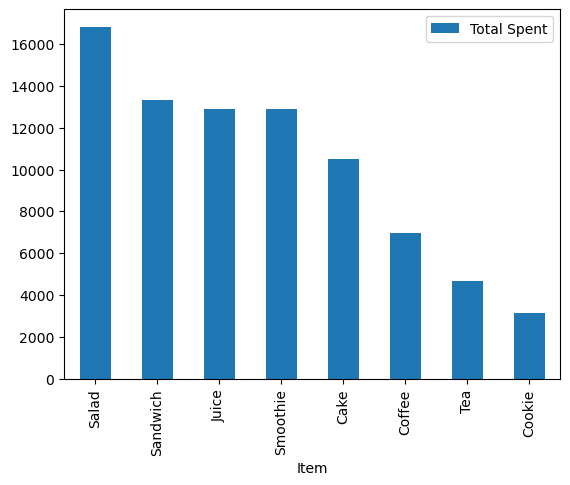

In [778]:
Revenue_by_Item = df.groupby(['Item'])['Total Spent'].sum().reset_index().sort_values(by='Total Spent', ascending=False) 

Revenue_by_Item.plot(kind='bar',x='Item',y='Total Spent')

In [779]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Cash,Takeaway,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [780]:
df.tail()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9992,TXN_2739140,Smoothie,4.0,4.0,16.0,Cash,In-store,2023-07-05
9994,TXN_7851634,Smoothie,4.0,4.0,16.0,Cash,In-store,2023-01-08
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Cash,Takeaway,2023-08-30
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,In-store,2023-03-02
9999,TXN_6170729,Sandwich,3.0,4.0,12.0,Cash,In-store,2023-11-07


In [781]:
df_salad = df[df['Item'] == 'Salad'].copy()

In [782]:
df_salad

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
3,TXN_7034554,Salad,2.0,5.0,10.0,Cash,Takeaway,2023-04-27
10,TXN_2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07
15,TXN_2847255,Salad,3.0,5.0,15.0,Credit Card,In-store,2023-11-15
37,TXN_1080432,Salad,2.0,5.0,10.0,Credit Card,In-store,2023-04-29
45,TXN_5455792,Salad,3.0,5.0,15.0,Cash,In-store,2023-03-22
...,...,...,...,...,...,...,...,...
9940,TXN_8273780,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-10-15
9942,TXN_5344848,Salad,1.0,5.0,5.0,Digital Wallet,Takeaway,2023-09-27
9958,TXN_4125474,Salad,2.0,5.0,10.0,Credit Card,In-store,2023-08-02
9971,TXN_6120851,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-02-04


In [783]:
df_salad['Transaction_Date_Month'] = df['Transaction Date'].dt.strftime('%B')

df_salad_pivot = df_salad.pivot_table(index='Transaction_Date_Month',columns='Item', aggfunc='size')


In [784]:
df_salad_pivot = df_salad_pivot.reset_index()
df_salad_pivot['Transaction_Month_No'] = pd.to_datetime(df_salad_pivot['Transaction_Date_Month'], format='%B').dt.month
df_salad_pivot = df_salad_pivot.sort_values('Transaction_Month_No')
df_salad_pivot = df_salad_pivot.set_index('Transaction_Date_Month')
df_salad_pivot = df_salad_pivot.drop(columns='Transaction_Month_No')



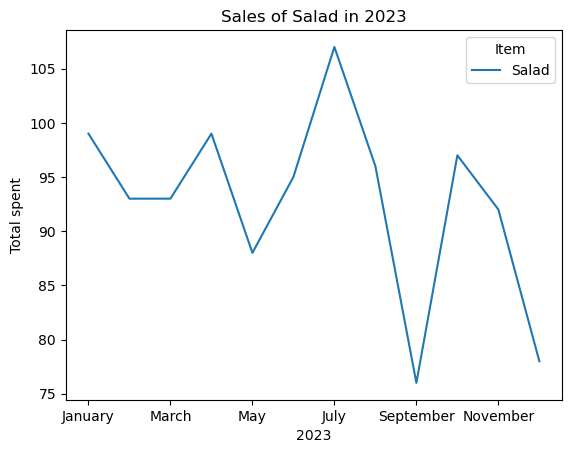

In [785]:
df_salad_pivot.plot(kind='line')
plt.title('Sales of Salad in 2023')
plt.xlabel('2023')
plt.ylabel('Total spent')
plt.show()

In [786]:
top_3_items = (df['Item']
               .value_counts()
               .head(3)
               .index.
               tolist()
               )

top_3_items

['Juice', 'Cake', 'Coffee']

In [787]:
df_top_3 = df[df['Item'].isin(top_3_items)].copy()
df_top_3

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
6,TXN_4433211,Cake,3.0,3.0,9.0,ERROR,Takeaway,2023-10-06
8,TXN_4717867,Cake,5.0,3.0,15.0,Cash,Takeaway,2023-07-28
...,...,...,...,...,...,...,...,...
9987,TXN_1784478,Juice,5.0,3.0,15.0,Cash,In-store,2023-07-31
9989,TXN_1741685,Juice,5.0,3.0,15.0,Cash,In-store,2023-08-18
9990,TXN_1538510,Coffee,5.0,2.0,10.0,Digital Wallet,In-store,2023-05-22
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Cash,Takeaway,2023-08-30


In [788]:
df_top_3['Transaction Month'] = pd.to_datetime(df['Transaction Date']).dt.strftime('%B')
df_top_3_pivot = df_top_3.pivot_table(index='Transaction Month', columns='Item', aggfunc='size')

df_top_3_pivot

Item,Cake,Coffee,Juice
Transaction Month,,,
April,91,90,112
August,102,96,112
December,91,105,133
February,83,87,113
January,100,90,127
July,91,91,93
June,92,106,122
March,101,100,135
May,95,89,123


In [789]:
df_top_3_pivot = df_top_3_pivot.reset_index()
df_top_3_pivot['Transaction Month No'] = pd.to_datetime(df_top_3_pivot['Transaction Month'], format='%B').dt.month
df_top_3_pivot = df_top_3_pivot.sort_values('Transaction Month No')
df_top_3_pivot = df_top_3_pivot.set_index('Transaction Month')
df_top_3_pivot = df_top_3_pivot.drop(columns='Transaction Month No')

df_top_3_pivot

Item,Cake,Coffee,Juice
Transaction Month,,,
January,100,90,127
February,83,87,113
March,101,100,135
April,91,90,112
May,95,89,123
June,92,106,122
July,91,91,93
August,102,96,112
September,109,87,110


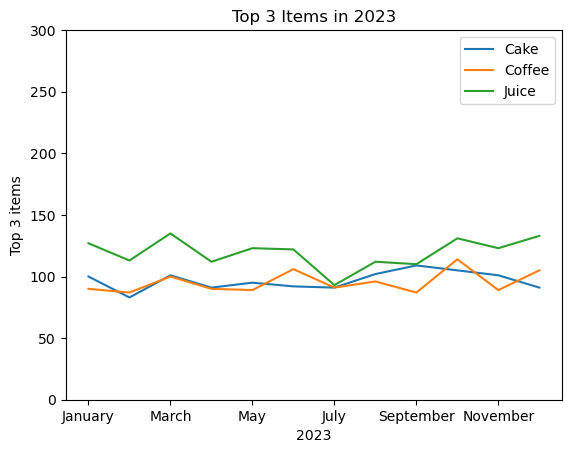

In [790]:
df_top_3_pivot.plot(kind='line')
plt.title('Top 3 Items in 2023')
plt.xlabel('2023')
plt.ylabel('Top 3 items')
plt.ylim(0,300)
plt.legend()
plt.show()

In [791]:
Top_juice_sales_month = df_top_3_pivot['Juice'].idxmax()
print(f'Top Juice sales month in 2023 was {Top_juice_sales_month}.')

Top_Cake_sales_month = df_top_3_pivot['Cake'].idxmax()
print(f'Top Cake sales month in 2023 was {Top_Cake_sales_month}.')

Top_Coffee_sales_month = df_top_3_pivot['Coffee'].idxmax()
print(f'Top Coffee sales month in 2023 was {Top_Coffee_sales_month}.')

Top Juice sales month in 2023 was March.
Top Cake sales month in 2023 was September.
Top Coffee sales month in 2023 was October.


In [792]:
least_3_items = (df['Item']
                 .value_counts()
                 .tail(3)
                 .index
                 .to_list()
                 )

least_3_items

['Cookie', 'Smoothie', 'Tea']

In [793]:
df_least_3_items = df[df['Item'].isin(least_3_items)].copy()


In [794]:
df_least_3_items['Transaction Month'] = pd.to_datetime(df_least_3_items['Transaction Date']).dt.strftime('%B')
df_least_3_pivot = df_least_3_items.pivot_table(index='Transaction Month', columns='Item', aggfunc='size')

In [796]:
df_least_3_pivot = df_least_3_pivot.reset_index()
df_least_3_pivot['Transaction Month No'] = pd.to_datetime(df_least_3_pivot['Transaction Month'], format= '%B').dt.month
df_least_3_pivot = df_least_3_pivot.sort_values('Transaction Month No')
df_least_3_pivot = df_least_3_pivot.set_index('Transaction Month')
df_least_3_pivot = df_least_3_pivot.drop(columns='Transaction Month No')

df_least_3_pivot

Item,Cookie,Smoothie,Tea
Transaction Month,,,
January,88,73,91
February,75,85,82
March,102,81,86
April,77,96,81
May,84,86,78
June,85,95,85
July,101,86,87
August,82,86,100
September,92,89,97


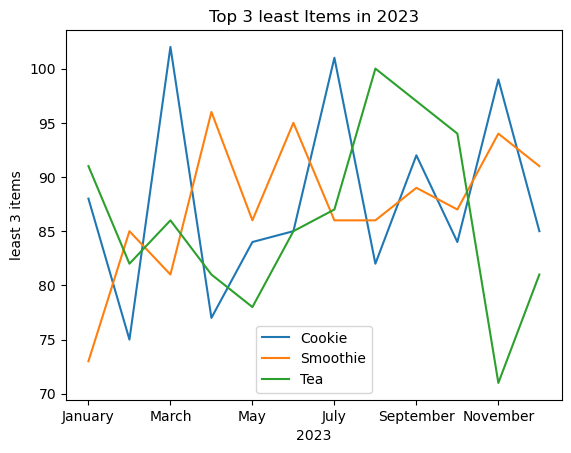

In [800]:
df_least_3_pivot.plot(kind='line')
plt.title('Top 3 least Items in 2023')
plt.xlabel('2023')
plt.ylabel('least 3 items')

plt.legend()
plt.show()